**IMPORT MODULES**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

**LOADING DATA**

In [3]:
# Set file path and convert csv file to pandas data frame
file_path = r'C:\Users\Sarvesh\Desktop\STAT 4355 Assignments\STAT 4355 Final Project\admission_data.csv'
grad_df = pd.read_csv(file_path)

**CLEANING DATA**

In [4]:
# Assign column names
grad_df.columns = ['GRE', 'TOEFL', 'UnivRtg', 'SOP', 'LOR', 'CGPA', 'Research', 'AdmitChance']
# Remove duplicates
grad_df = grad_df.drop_duplicates()
# Remove entries with missing values
grad_df = grad_df.dropna()
# Check variable data types
# grad_df.info()

# Subset data by university ratings
grad_df_ur_1 = grad_df[grad_df['UnivRtg'] == 1] # 34 observations
grad_df_ur_2 = grad_df[grad_df['UnivRtg'] == 2] # 126 observations
grad_df_ur_3 = grad_df[grad_df['UnivRtg'] == 3] # 162 observations
grad_df_ur_4 = grad_df[grad_df['UnivRtg'] == 4] # 105 observations
grad_df_ur_5 = grad_df[grad_df['UnivRtg'] == 5] # 73 observations

print(grad_df)

     GRE  TOEFL  UnivRtg  SOP  LOR  CGPA  Research  AdmitChance
0    337    118        4  4.5  4.5  9.65         1         0.92
1    324    107        4  4.0  4.5  8.87         1         0.76
2    316    104        3  3.0  3.5  8.00         1         0.72
3    322    110        3  3.5  2.5  8.67         1         0.80
4    314    103        2  2.0  3.0  8.21         0         0.65
..   ...    ...      ...  ...  ...   ...       ...          ...
495  332    108        5  4.5  4.0  9.02         1         0.87
496  337    117        5  5.0  5.0  9.87         1         0.96
497  330    120        5  4.5  5.0  9.56         1         0.93
498  312    103        4  4.0  5.0  8.43         0         0.73
499  327    113        4  4.5  4.5  9.04         0         0.84

[500 rows x 8 columns]


**EXPLORATORY DATA ANALYSIS**

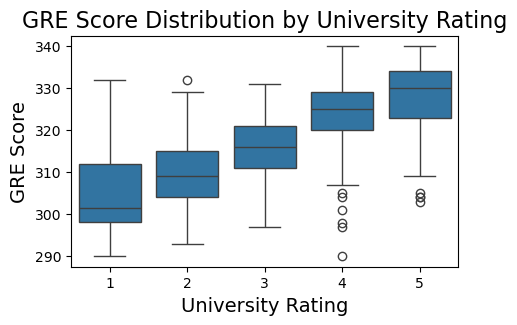

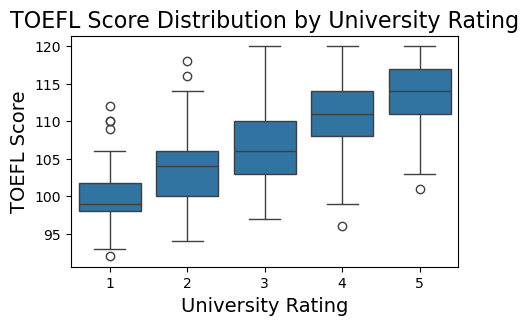

C:\Users\Sarvesh\AppData\Local\Temp\ipykernel_34392\3186794822.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sop_counts = grad_df.groupby(['UnivRtg', 'SOP']).size().unstack()


<Figure size 500x300 with 0 Axes>

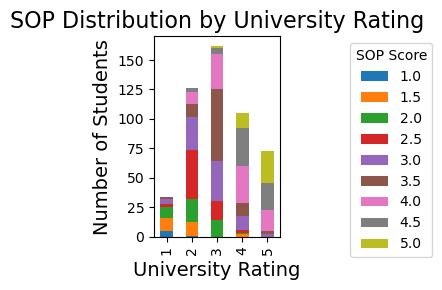

C:\Users\Sarvesh\AppData\Local\Temp\ipykernel_34392\3186794822.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lor_counts = grad_df.groupby(['UnivRtg', 'LOR']).size().unstack()


<Figure size 500x300 with 0 Axes>

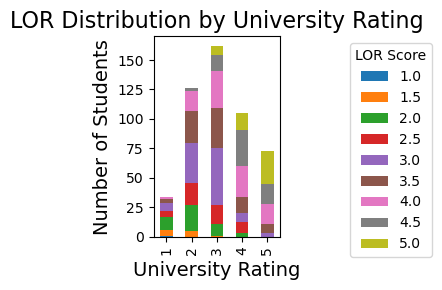

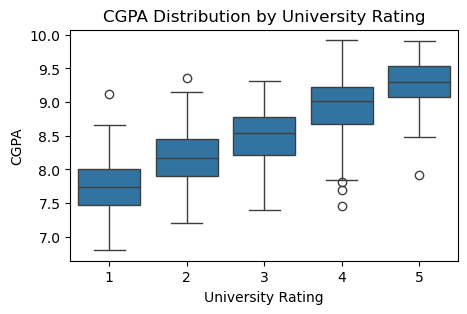

C:\Users\Sarvesh\AppData\Local\Temp\ipykernel_34392\3186794822.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res_counts = grad_df.groupby(['UnivRtg', 'Research']).size().unstack()


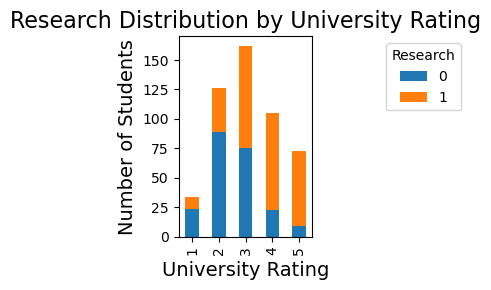

<Figure size 500x300 with 0 Axes>

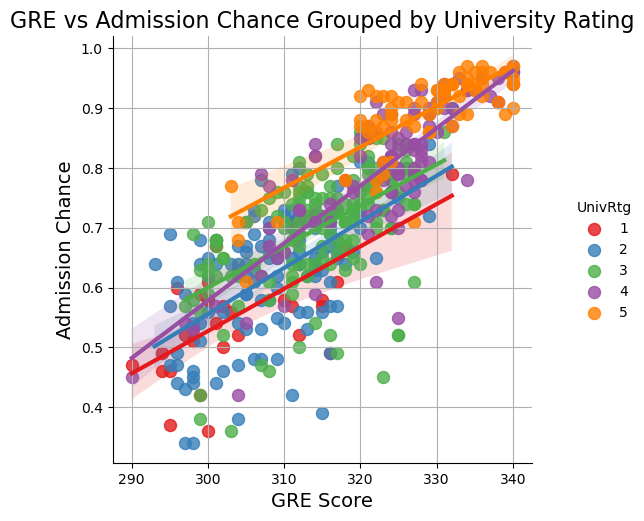

<Figure size 500x300 with 0 Axes>

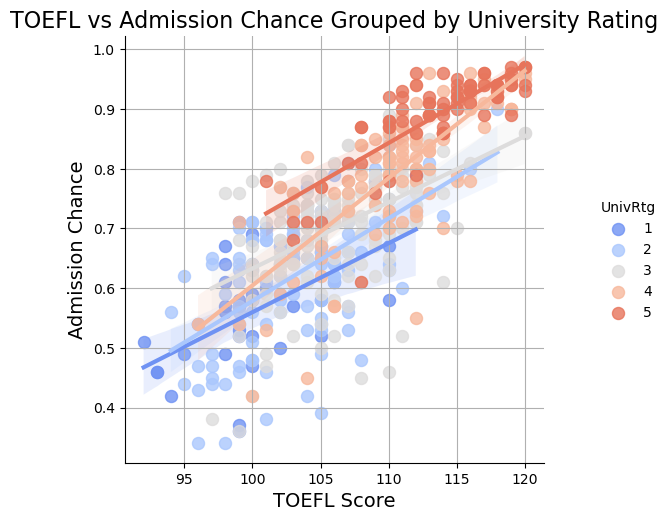

<Figure size 500x300 with 0 Axes>

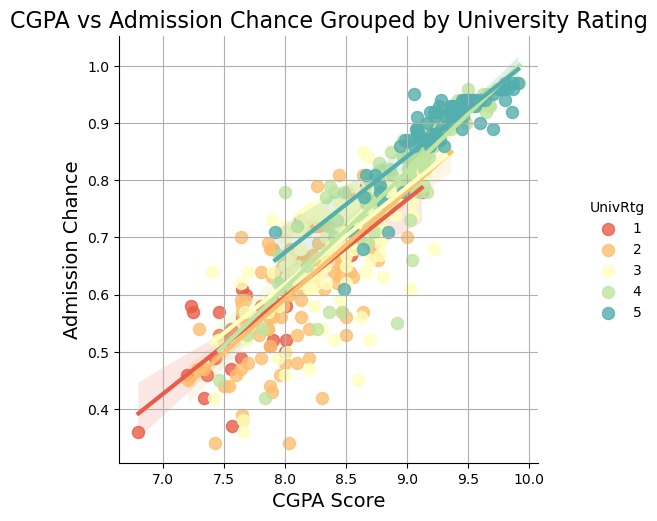

In [18]:
# Box Plot: University Rating vs GRE
plt.figure(figsize = (5, 3))
sns.boxplot(y = 'GRE', x = 'UnivRtg', data = grad_df)
plt.title('GRE Score Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('GRE Score', fontsize = 14)
plt.show()

# Box Plot: University Rating vs TOEFL
plt.figure(figsize = (5, 3))
sns.boxplot(y = 'TOEFL', x = 'UnivRtg', data = grad_df)
plt.title('TOEFL Score Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('TOEFL Score', fontsize = 14)
plt.show()

# Bar Plot: University Rating vs SOP 
plt.figure(figsize = (5, 3))
sop_counts = grad_df.groupby(['UnivRtg', 'SOP']).size().unstack()
sop_counts.plot(kind = 'bar', stacked = True, figsize = (5, 3))

plt.title('SOP Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('Number of Students', fontsize = 14)
plt.legend(title ='SOP Score', bbox_to_anchor =(1.5, 1), loc= 'upper left')
plt.tight_layout()
plt.show()

# Bar Plot: University Rating vs LOR
plt.figure(figsize = (5, 3))
lor_counts = grad_df.groupby(['UnivRtg', 'LOR']).size().unstack()
lor_counts.plot(kind = 'bar', stacked = True, figsize = (5, 3))

plt.title('LOR Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('Number of Students', fontsize = 14)
plt.legend(title = 'LOR Score', bbox_to_anchor = (1.5, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

# Box Plot: University Rating vs CGPA
plt.figure(figsize = (5, 3))
sns.boxplot(y = 'CGPA', x = 'UnivRtg', data = grad_df)
plt.title('CGPA Distribution by University Rating')
plt.xlabel('University Rating')
plt.ylabel('CGPA')
plt.show()

# Bar Plot: University Rating vs Research
res_counts = grad_df.groupby(['UnivRtg', 'Research']).size().unstack()
res_counts.plot(kind = 'bar', stacked = True, figsize = (5, 3))

plt.title('Research Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('Number of Students', fontsize = 14)
plt.legend(title = 'Research', bbox_to_anchor = (1.5, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

# Scatter Plot: GRE vs AdmitChance (grouped by University Rating)
grad_df['UnivRtg'] = grad_df['UnivRtg'].astype('category')

plt.figure(figsize = (5, 3))
sns.lmplot(data = grad_df, x = 'GRE', y = 'AdmitChance', hue = 'UnivRtg', scatter_kws = {'s':75}, palette = 'Set1', 
          line_kws = {'linewidth' : 3})
plt.title('GRE vs Admission Chance Grouped by University Rating', fontsize = 16)
plt.xlabel('GRE Score', fontsize = 14)
plt.ylabel('Admission Chance', fontsize = 14)
plt.grid(True)
plt.show()

# Scatter Plot: TOEFL vs AdmitChance (grouped by University Rating)
plt.figure(figsize = (5, 3))
sns.lmplot(data = grad_df, x = 'TOEFL', y = 'AdmitChance', hue = 'UnivRtg', scatter_kws = {'s':75}, palette = 'coolwarm', 
          line_kws = {'linewidth' : 3})
plt.title('TOEFL vs Admission Chance Grouped by University Rating', fontsize = 16)
plt.xlabel('TOEFL Score', fontsize = 14)
plt.ylabel('Admission Chance', fontsize = 14)
plt.grid(True)
plt.show()

# Scatter Plot: CGPA vs AdmitChance (grouped by University Rating)
plt.figure(figsize = (5, 3))
sns.lmplot(data = grad_df, x = 'CGPA', y = 'AdmitChance', hue = 'UnivRtg', scatter_kws = {'s':75}, palette = 'Spectral', 
          line_kws = {'linewidth' : 3})
plt.title('CGPA vs Admission Chance Grouped by University Rating', fontsize = 16)
plt.xlabel('CGPA Score', fontsize = 14)
plt.ylabel('Admission Chance', fontsize = 14)
plt.grid(True)
plt.show()

**CORRELATION ANALYSIS**

**MODEL BUILDING**

In [29]:
x_ur_5 = grad_df_ur_5[['GRE', 'TOEFL', 'SOP', 'LOR',  'CGPA',  'Research']]
y_ur_5 = grad_df_ur_5[['AdmitChance']]

x_train_ur_5, x_test_ur_5, y_train_ur_5, y_test_ur_5 = train_test_split(x_ur_5, y_ur_5, test_size = 0.8, random_state = 42)

scaler = StandardScaler()
x_train_ur_5 = scaler.fit_transform(x_train_ur_5)
x_test_ur_5 = scaler.transform(x_test_ur_5)

x_train_ur_5 = sm.add_constant(x_train_ur_5)
x_test_ur_5 = sm.add_constant(x_test_ur_5)

model_ur_5 = sm.OLS(y_train_ur_5, x_train_ur_5).fit()
print(model_ur_5.summary())

y_pred_ur_5 = model_ur_5.predict(x_test_ur_5)

print(y_pred_ur_5)

                            OLS Regression Results                            
Dep. Variable:            AdmitChance   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     47.06
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           2.62e-05
Time:                        23:16:39   Log-Likelihood:                 37.652
No. Observations:                  14   AIC:                            -61.30
Df Residuals:                       7   BIC:                            -56.83
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8764      0.006    141.094      0.0

C:\Users\Sarvesh\anaconda3\envs\GradPred\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)
